In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_temp = pd.read_csv("/home/jumar/Desktop/data_analisys/datasets/GlobalLandTemperaturesByCountry.csv")
df_temp

In [ ]:
df_temp.shape

In [ ]:
df_temp.info()

In [ ]:
df_temp['Country'].unique()

In [ ]:
df_temp['year'] = pd.to_datetime(df_temp['dt'])
df_temp['year']

In [ ]:
idx = df_temp['year'] > pd.to_datetime('1970-01-01')
df_temp = df_temp[idx]
df_temp

In [ ]:
df_temp_avg = df_temp.groupby(['Country', 
                 pd.Grouper(key='year', freq='1Y')]
               ).agg({'AverageTemperature': [np.mean, np.median]})
df_temp_avg

In [ ]:
df_temp_avg.xs('Russia')['AverageTemperature'].plot()

In [ ]:
df_temp_med = df_temp_avg['AverageTemperature'][['median']].reset_index()
df_temp_med

In [ ]:
df_temp_med['date'] = df_temp_med['year'].dt.year
df_temp_med['date']

In [ ]:
df_temp_med.rename(columns={'median': 'temperature'}, inplace=True)
df_temp_med

In [ ]:
df_temp_pivot = df_temp_med.pivot_table(values='temperature', index='date', columns='Country')
df_temp_pivot

In [ ]:
df_temp_pivot.boxplot()

In [ ]:
df_temp_pivot.T.sample(10).T.head(4).boxplot(rot=45)

In [ ]:
df_agri = pd.read_csv('/home/jumar/Desktop/data_analisys/datasets/API_AG.LND.AGRI.K2_DS2_en_csv_v2_716226.csv', header = 2)
df_fore = pd.read_csv('/home/jumar/Desktop/data_analisys/datasets/API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv', header = 2)
df_elec = pd.read_csv('/home/jumar/Desktop/data_analisys/datasets/API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_715482.csv', header = 2)
df_co2e = pd.read_csv('/home/jumar/Desktop/data_analisys/datasets/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv', header = 2)
df_popu = pd.read_csv('/home/jumar/Desktop/data_analisys/datasets/API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv', header = 2)

In [ ]:
df_popu

In [ ]:
years = [ str(i) for i in range(1971,2016)]
cols = ['Country Name','Country Code'] + years
cols

In [ ]:
def df_format(df, col='agriculture'):
    return df.loc[:, cols].melt(id_vars=['Country Name','Country Code']).rename(
    columns={
               'variable': 'date',
               'Country Name':'Country',
               'Country Code':'name',
               'value': col
            }
)

In [ ]:
df_agri = df_format(df_agri, col='agriculture')
df_fore = df_format(df_fore, col='forest')
df_elec = df_format(df_elec, col='electricprod')
df_co2e = df_format(df_co2e, col='co2')
df_popu = df_format(df_popu, col='population')
df_popu

In [43]:
df_co2e

,Country,name,date,co2
0,Aruba,ABW,1971,NaN
1,Afghanistan,AFG,1971,1895.839
2,Angola,AGO,1971,3410.310
3,Albania,ALB,1971,4352.729
4,Andorra,AND,1971,NaN
...,...,...,...,...
11875,Kosovo,XKX,2015,NaN
11876,"Yemen, Rep.",YEM,2015,NaN
11877,South Africa,ZAF,2015,NaN
11878,Zambia,ZMB,2015,NaN


In [45]:
df_popu['date'] = df_popu['date'].astype(float)
df_agri['date'] = df_agri['date'].astype(float)
df_fore['date'] = df_fore['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)

In [46]:
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11880 entries, 0 to 11879
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11880 non-null  object 
 1   name        11880 non-null  object 
 2   date        11880 non-null  float64
 3   population  11763 non-null  float64
dtypes: float64(2), object(2)
memory usage: 371.4+ KB


In [47]:
df_merge = pd.merge(df_temp_med, df_agri, on=['Country', 'date'],how="inner").merge(df_co2e,on=['Country', 'date', 'name'],how="inner").merge(df_elec,on=["Country","date","name"],how="inner").merge(df_fore,on=["Country","date","name"],how="inner").merge(df_popu,on=["Country","date","name"],how="inner")
df_merge

,Country,year,temperature,date,name,agriculture,co2,electricprod,forest,population
0,Afghanistan,1971-12-31,14.9340,1971,AFG,380360.0,1895.839,NaN,NaN,11475445.0
1,Afghanistan,1972-12-31,13.8725,1972,AFG,380460.0,1532.806,NaN,NaN,11791215.0
2,Afghanistan,1973-12-31,14.9130,1973,AFG,380480.0,1639.149,NaN,NaN,12108963.0
3,Afghanistan,1974-12-31,13.6160,1974,AFG,380480.0,1917.841,NaN,NaN,12412950.0
4,Afghanistan,1975-12-31,13.5130,1975,AFG,380480.0,2126.860,NaN,NaN,12689160.0
...,...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,2009-12-31,22.4860,2009,ZWE,163000.0,5603.176,585.456912,159510.000000,12526968.0
7220,Zimbabwe,2010-12-31,23.3040,2010,ZWE,162000.0,7777.707,606.644199,156240.000000,12697723.0
7221,Zimbabwe,2011-12-31,22.9420,2011,ZWE,164000.0,9563.536,636.249337,153115.996094,12894316.0
7222,Zimbabwe,2012-12-31,23.0455,2012,ZWE,162000.0,7792.375,608.762505,149992.001953,13115131.0


In [48]:
df_climate = df_merge.dropna()

In [51]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America   5,886,299.6
United States   5,382,123.7
China           3,668,917.8
Japan           1,202,082.9
India           1,047,705.9
                    ...    
Haiti               1,652.0
Mozambique          1,584.1
Togo                1,285.3
Niger                 784.7
Eritrea               614.2
Name: co2, Length: 120, dtype: float64

In [50]:
pd.set_option('display.float_format', '{:,.1f}'.format)

In [52]:
first_10 = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index
first_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')

In [53]:
df_max_co2 = df_climate[df_climate['Country'].isin(first_10)]
df_max_co2

,Country,year,temperature,date,name,agriculture,co2,electricprod,forest,population
1266,Canada,1990-12-31,-4.6,1990,CAN,"677,680.0","435,181.2","16,167.4","3,482,730.0","27,691,138.0"
1267,Canada,1991-12-31,-4.2,1991,CAN,"677,530.0","426,780.1","16,181.6","3,482,259.1","28,037,420.0"
1268,Canada,1992-12-31,-5.0,1992,CAN,"678,140.0","440,978.8","16,164.4","3,481,788.1","28,371,264.0"
1269,Canada,1993-12-31,-4.0,1993,CAN,"678,740.0","445,580.8","16,320.1","3,481,316.9","28,684,764.0"
1270,Canada,1994-12-31,-3.4,1994,CAN,"679,340.0","456,849.5","16,388.3","3,480,845.9","29,000,663.0"
...,...,...,...,...,...,...,...,...,...,...
7004,United States,2009-12-31,8.4,2009,USA,"4,099,606.9","5,263,505.5","12,913.7","3,079,274.1","306,771,529.0"
7005,United States,2010-12-31,10.2,2010,USA,"4,084,261.9","5,395,532.1","13,394.9","3,087,200.0","309,326,085.0"
7006,United States,2011-12-31,9.5,2011,USA,"4,046,693.1","5,289,680.5","13,246.0","3,089,950.0","311,580,009.0"
7007,United States,2012-12-31,9.9,2012,USA,"4,087,065.0","5,119,436.4","12,964.3","3,092,700.0","313,874,218.0"


<AxesSubplot:xlabel='population', ylabel='co2'>

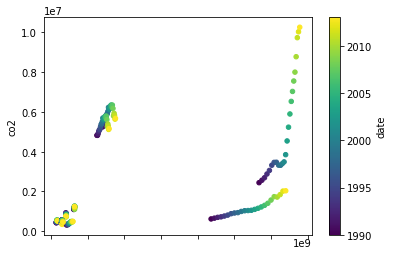

In [54]:
df_max_co2.set_index('Country').plot.scatter(x='population', y='co2', c='date', colormap='viridis')

In [55]:
df_climate.corr()

,temperature,date,agriculture,co2,electricprod,forest,population
temperature,1.0,0.0,-0.1,-0.2,-0.4,-0.1,-0.0
date,0.0,1.0,-0.0,0.0,0.1,-0.0,0.0
agriculture,-0.1,-0.0,1.0,0.8,0.1,0.7,0.6
co2,-0.2,0.0,0.8,1.0,0.2,0.7,0.6
electricprod,-0.4,0.1,0.1,0.2,1.0,0.2,-0.0
forest,-0.1,-0.0,0.7,0.7,0.2,1.0,0.4
population,-0.0,0.0,0.6,0.6,-0.0,0.4,1.0


In [57]:
import seaborn as sns

<AxesSubplot:>

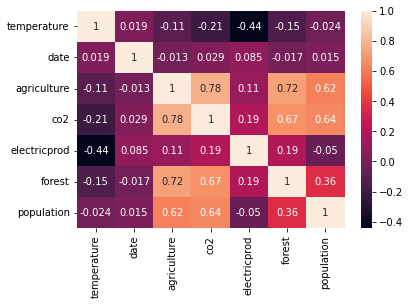

In [59]:
sns.heatmap(df_climate.corr(), annot=True)

In [60]:
df_med = df_climate.groupby('date').median()
df_med

,temperature,agriculture,co2,electricprod,forest,population
date,,,,,,
1990,22.7,"90,195.0","31,363.9","1,114.7","54,005.0","10,213,863.0"
1991,22.4,"91,870.0","27,343.0","1,072.5","60,307.5","10,346,663.5"
1992,19.9,"89,700.0","26,420.7","1,451.8","45,621.0","9,188,305.5"
1993,20.6,"89,890.0","28,267.1","1,520.3","44,579.0","9,951,683.5"
1994,20.7,"89,150.0","29,640.4","1,576.8","42,572.0","9,991,525.0"
1995,20.1,"81,080.0","29,090.3","1,578.3","41,640.0","10,026,176.0"
1996,20.2,"79,870.0","30,670.8","1,687.1","41,270.0","10,063,945.0"
1997,20.4,"80,120.0","30,623.1","1,762.4","41,270.0","10,108,977.0"
1998,21.5,"80,550.0","31,675.5","1,807.3","40,834.0","10,069,000.0"


<AxesSubplot:>

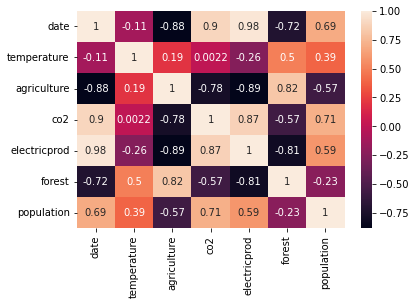

In [62]:
sns.heatmap(df_med.reset_index().corr(), annot=True)

In [63]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='date', ylabel='date'>,
        <AxesSubplot:xlabel='temperature', ylabel='date'>,
        <AxesSubplot:xlabel='agriculture', ylabel='date'>,
        <AxesSubplot:xlabel='co2', ylabel='date'>,
        <AxesSubplot:xlabel='electricprod', ylabel='date'>,
        <AxesSubplot:xlabel='forest', ylabel='date'>,
        <AxesSubplot:xlabel='population', ylabel='date'>],
       [<AxesSubplot:xlabel='date', ylabel='temperature'>,
        <AxesSubplot:xlabel='temperature', ylabel='temperature'>,
        <AxesSubplot:xlabel='agriculture', ylabel='temperature'>,
        <AxesSubplot:xlabel='co2', ylabel='temperature'>,
        <AxesSubplot:xlabel='electricprod', ylabel='temperature'>,
        <AxesSubplot:xlabel='forest', ylabel='temperature'>,
        <AxesSubplot:xlabel='population', ylabel='temperature'>],
       [<AxesSubplot:xlabel='date', ylabel='agriculture'>,
        <AxesSubplot:xlabel='temperature', ylabel='agriculture'>,
        <AxesSubplot:xlabel='agricultu

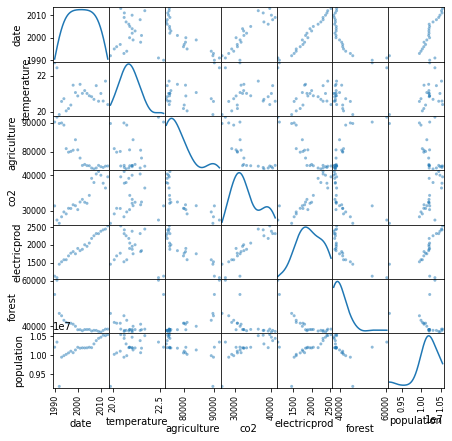

In [65]:
scatter_matrix(df_med.reset_index(), diagonal='kde', figsize=(7, 7))

In [66]:
from pandas.plotting import parallel_coordinates

In [69]:
df_south_am = df_climate[df_climate['Country'].isin(['Colombia', 'Argentina', 'Bolivia', 'Mexico', 'Peru', 'Chile'])][['Country', 'temperature', 'co2', 'agriculture', 'forest']]

<AxesSubplot:>

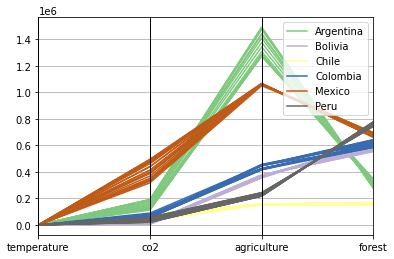

In [70]:
parallel_coordinates(df_south_am, 'Country', colormap='Accent')